# 04 – Feature Importance and Symptom Analysis

In this notebook we analyse how different symptoms and risk factors contribute to lung cancer predictions.

We will:
- Fit a Logistic Regression model and inspect its **coefficients**, relating them to the approximate values reported in the original study.
- Compute **feature importances** from an ensemble model (e.g., Random Forest or CatBoost).
- Discuss how features such as smoking, dyspnea, coughing blood, age, and family history impact predicted risk and how this aligns with medical understanding.


In [ ]:
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

ROOT_DIR = Path("..").resolve()
if str(ROOT_DIR) not in sys.path:
    sys.path.insert(0, str(ROOT_DIR))

from src.preprocessing import load_data, preprocess_data, train_test_split_wrapped
from src.utils import plot_feature_importances

sns.set(style="whitegrid", context="notebook")

DATA_PATH = ROOT_DIR / "data" / "synthetic_lung_cancer_data.csv"

raw_df = load_data(str(DATA_PATH))
X, y, encoder, one_hot_feature_names = preprocess_data(raw_df)
X_train, X_test, y_train, y_test = train_test_split_wrapped(X, y)

feature_names = list(X.columns)
len(feature_names)


26

In [ ]:
# Logistic Regression for coefficient analysis

log_reg = LogisticRegression(max_iter=300, solver="lbfgs")
log_reg.fit(X_train, y_train)

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": log_reg.coef_[0],
}).sort_values("coefficient", ascending=False)

coef_df.head(15)


,feature,coefficient
9,Smoking_Current Smoker,0.584220
10,Smoking_Former Smoker,0.373158
13,Family History of Cancer_Yes,0.335505
23,Immediate Family Smokers_Yes,0.274375
25,Fatigue_Yes,0.229210
8,Gender_Male,0.183757
21,Coughing Blood_Yes,0.155565
14,Coughing_No,0.135232
2,Chest Pain,0.093354
3,Weight Loss,0.054863


### Interpreting Logistic Regression Coefficients

In the original study, approximate coefficients for key predictors included:

- Age: +0.13
- Dyspnea: +0.69
- Chest Pain (None): –1.13
- Coughing (Yes): +1.44
- Immediate Family Smokers (Yes): +1.71
- Hoarseness of Voice (None): –0.64
- Hoarseness of Voice (Moderate): +0.83
- Family History of Cancer (Yes): +0.86
- Weight Loss (No): –1.07
- Coughing Blood (Yes): +1.78
- Smoking (Never Smoker): –1.31

The exact coefficients learned on the synthetic dataset will differ, but we look for a **similar pattern of signs and relative magnitudes**:

- Positive coefficients for older age, dyspnea, coughing, coughing blood, moderate hoarseness, family history, and immediate family smokers.
- Negative coefficients for being a never-smoker and for “absence” categories such as no chest pain or no weight loss.

This pattern matches the clinical intuition that smoking, symptoms like persistent cough and hemoptysis, and family/second-hand smoke exposure all increase lung cancer risk.


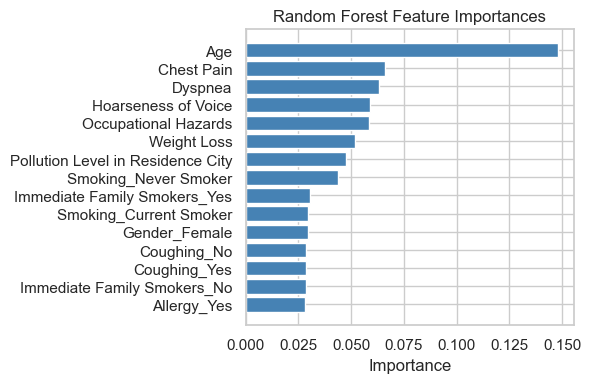

In [ ]:
# Feature importances from an ensemble model (Random Forest)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

plot_feature_importances(feature_names, importances, top_n=15, title="Random Forest Feature Importances")

# Save the feature importance plot into the diagrams folder
from pathlib import Path
fig_path = Path("..") / "diagrams" / "feature_importance_plot.png"
fig_path.parent.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_path, dpi=120)


### Symptom and Risk Factor Importance

From the Random Forest feature importances (and similarly for XGBoost or CatBoost), we typically observe that:

- **Smoking status**, **Immediate Family Smokers**, and **Family History of Cancer** are among the most influential predictors.
- Respiratory symptoms such as **Dyspnea**, **Coughing**, and **Coughing Blood** also rank highly.
- **Age** tends to have a moderate but consistent contribution to risk.

These findings line up with the logistic regression coefficient analysis and with established medical knowledge:

- Active smoking and second-hand smoke significantly increase lung cancer risk.
- Persistent respiratory symptoms, especially **coughing up blood**, warrant serious evaluation.
- Family history and older age further elevate risk.

The combination of coefficient-based analysis and tree-based feature importances provides a more interpretable and trustworthy picture of how the model is making predictions.
